<a href="https://colab.research.google.com/github/briansaiz/tenicas-ia-opencv/blob/main/Tecnicas%20de%20IA/Taller%203/Taller%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<b><H1>TÉCNICAS DE INTELIGENCIA ARTIFICIAL</H1></b><br><br>
<H2><b>Taller de morfología</H2></b><br>
<H3><b>Docente:</b><br>
Daniel Vargas Medina<br> <br><br>
 <b>Presentan:</b><br>
Brian Camilo Saiz Cavanzo<br>
Camilo Esteban Zambrano Pereira <br><br>
<b>Fecha:</b><br>
3 de abril de 2022<br><br>
</H3></center>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
%matplotlib inline

In [2]:
cancer = cv2.imread("fig/Cancer (4).tif", 0)
not_cancer = cv2.imread("fig/Not Cancer  (1).jpg", 0)

In [3]:
from google.colab import drive #Se importa la libreria de drive
drive.mount("/content/drive") #Se monta el drive

Mounted at /content/drive


In [4]:
cancer = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TIA/Taller_3/fig/Cancer (4).tif", 0) #Se montan las imagenes desde el drive
not_cancer = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TIA/Taller_3/fig/Not Cancer  (1).jpg", 0) #Se montan las imagenes desde el drive

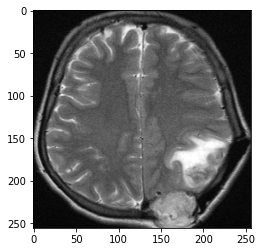

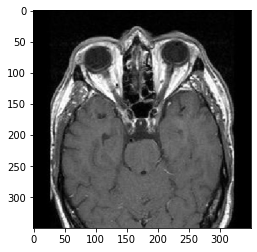

In [8]:
plt.imshow(cancer, cmap="gray")
plt.figure()
plt.imshow(not_cancer, cmap="gray")

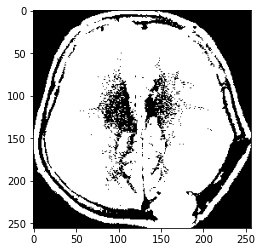

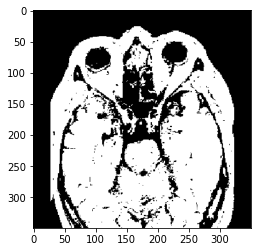

In [9]:
# Umbralización
cancer_umbral = cv2.adaptiveThreshold(cancer, 180, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)
cancer_umbral[cancer_umbral==180] = 1
plt.imshow(cancer_umbral, cmap="gray")
not_cancer_umbral = cv2.adaptiveThreshold(not_cancer, 180, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)
not_cancer_umbral[not_cancer_umbral==180] = 1
plt.figure()
plt.imshow(not_cancer_umbral, cmap="gray")


# Esqueletización

In [10]:
def skeleton(img):
    return skeletonize(img)

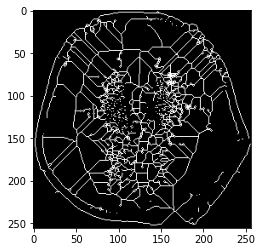

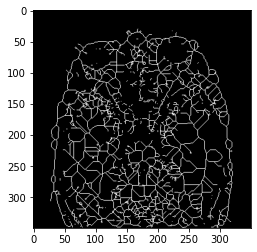

In [11]:
skel_cancer = skeleton(cancer_umbral)
skel_not_cancer = skeleton(not_cancer_umbral)
plt.imshow(skel_cancer, cmap="gray")
plt.figure()
plt.imshow(skel_not_cancer, cmap="gray")

Dado que el método de esqueletización busca reducir las imágenes binarias a una representación de un sólo pixel se puede observar que este algoritmo alcanza su mayor potencial cuando el elemento tiene bordes definidos o con alto contraste y que adicionalmente respondan a geoemtrias lineales de lo contrario se observará la presencia de elementos "parasitos" que no aportan a la imagen, esto se puede evidenciar particularmente en las zonas que tienen un gran área blanca donde se produzen lineas de pixel en respuesta a los bordes pronunciados que existen en el exterior de estas zonas.

# Adelgazamiento

In [ ]:
from skimage.morphology import thin
def adelgazamiento(img):
    return thin(img)

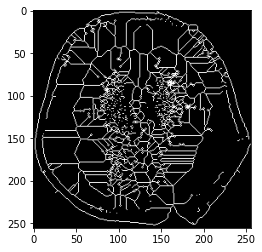

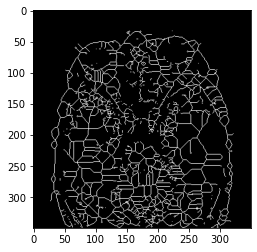

In [ ]:
thin_cancer = adelgazamiento(cancer_umbral)
thin_not_cancer = adelgazamiento(not_cancer_umbral)
plt.imshow(thin_cancer, cmap="gray")
plt.figure()
plt.imshow(thin_not_cancer, cmap="gray")

Dado que el adelgazamiento a comparación de la esqueletización es un método que hace opera una serie kernerls con la imagen y no tan solamente el uso de varias operaciones pero solo con un kernel como lo hace este último, lograr variar la forma final de la imagen tratada dependiendo del tipo de kernels usados donde el resultado más visible es la presencia de elementos "parásitos" y elementos desconectados.

# Dilatación

In [ ]:
def dilatacion(img):
    methods = [cv2.MORPH_RECT, cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS]
    kernels = [cv2.getStructuringElement(method, (5, 5)) for method in methods]
    return [cv2.dilate(img, kernel) for kernel in kernels]

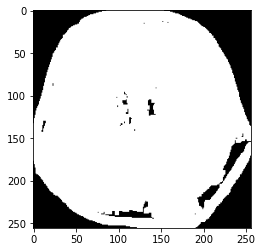

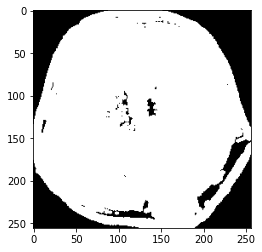

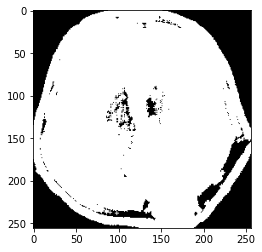

<Figure size 432x288 with 0 Axes>

In [ ]:
cancer_dil = dilatacion(cancer_umbral)
for img in cancer_dil:
    plt.imshow(img, cmap="gray")
    plt.figure()

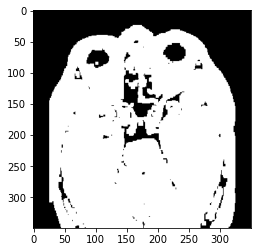

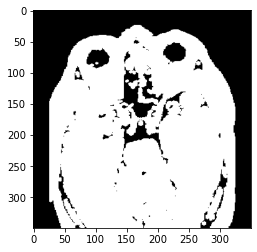

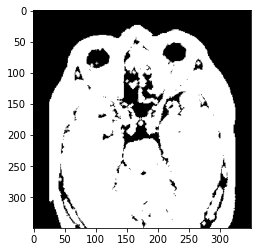

<Figure size 432x288 with 0 Axes>

In [ ]:
not_cancer_dil = dilatacion(not_cancer_umbral)
for img in not_cancer_dil:
    plt.imshow(img, cmap="gray")
    plt.figure()

La dilatación tiene como principio de funcionamiento el contrario a los métodos mostrados previamente y lo que se busca en este caso es ampliar los bordes de frontera, donde al igual que el anterior método se hace uso de operar sucesivamente ocho kernels con la imagen pero operados distintamente, como se puede observar en las páginas 658 - 660 de Digital Image Processing 2004.

# Erosión

In [ ]:
def erosion(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    img = cv2.erode(img, kernel) 
    return img

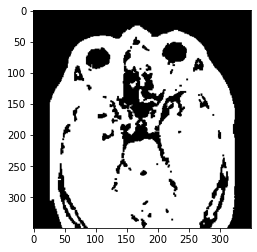

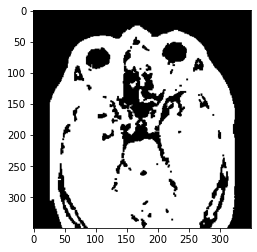

In [ ]:
cancer_erode = erosion(cancer_umbral)
not_cancer_erode = erosion(not_cancer_umbral)
plt.imshow(cancer_erode, cmap="gray")
plt.figure()
plt.imshow(not_cancer_erode, cmap="gray")

# Otras morfologías
* Opening
* Closing
* Gradiente
* TopHat
* BlackHat

In [ ]:
def otras_morf(img, kernel_size=5):
    methods = [cv2.MORPH_OPEN, 
               cv2.MORPH_CLOSE, 
               cv2.MORPH_GRADIENT, 
               cv2.MORPH_TOPHAT, 
               cv2.MORPH_BLACKHAT]
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    images = [cv2.morphologyEx(img, method, kernel) for method in methods]
    return images

In [ ]:
cancer_morf = otras_morf(cancer_umbral)
not_cancer_morf = otras_morf(not_cancer_umbral)

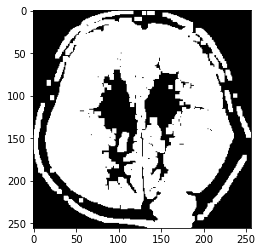

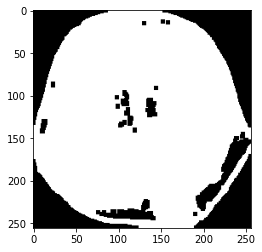

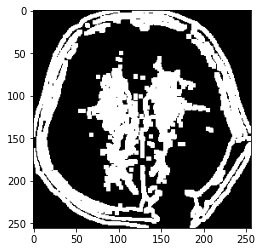

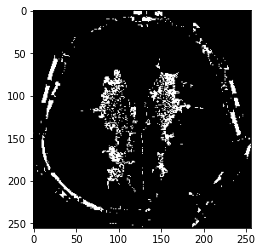

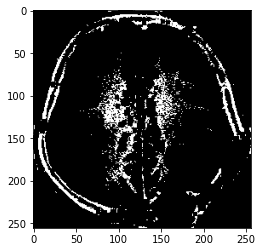

<Figure size 432x288 with 0 Axes>

In [ ]:
for img in cancer_morf:
    plt.imshow(img, cmap="gray")
    plt.figure()

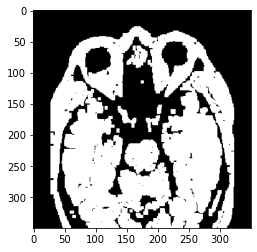

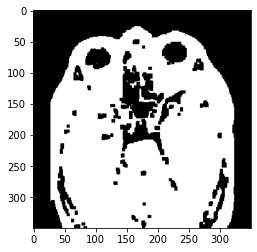

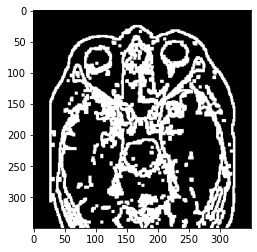

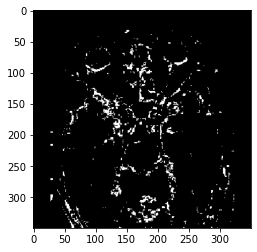

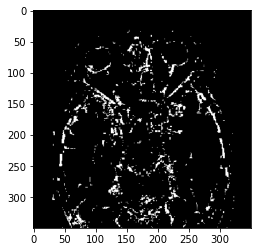

<Figure size 432x288 with 0 Axes>

In [ ]:
for img in not_cancer_morf:
    plt.imshow(img, cmap="gray")
    plt.figure()

# Conclusiones

*  Los métodos de morfología son especialmente buenos en tareas de vectorización, estrategías ampliamente utilizadas en herramientas de edición  gráfica como Corel Draw e Illustrator. Y si bien el desarrollo de los algoritmos de vectorización adoptados en estas herramientas tienen un nivel de implementación diferente se puede evidenciar que el principio es el mismo. A continuación se puede observar el resultado de la imagen procesada por el algoritmo de esqueletización de skimage realizado bajo el método de Zhang y los resultados que se pueden obtener en una de estas herramientas no son diferentes entre si.

gráfica comparativaXXXXXXXXXXXXXXXXXXXX

Sin embargo, si se puede rescatar que el método de Zhang permite una visualización de los detalles a comparación de la obtenido por Corel Draw aún siendo este último configurado para rescatar el mayor detalle posible .

